In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('data/adapt.csv')
df

,size,pin,threads,runtime,usertime,energy
0,500,False,16,0.047429,0.729884,2.078485
1,500,False,16,0.047096,0.729600,2.072566
2,500,False,16,0.046989,0.729510,2.052241
3,500,False,16,0.047087,0.729735,2.068171
4,500,False,16,0.047105,0.730934,2.069880
...,...,...,...,...,...,...
1425,1500,False,8,1.603869,12.742159,67.605356
1426,1500,False,8,1.604740,12.749308,67.616221
1427,1500,False,8,1.604347,12.744524,67.720469
1428,1500,False,8,1.603840,12.740402,67.860361


In [56]:
def optimum(size, pin):
    match (size, pin):
        case (500, True):
            return 15
        case (500, _) | (750, _) | (1000, _):
            return 16
        case (1250, False) | (1500, False):
            return 8
        case (1250, True) | (1500, True):
            return 12
        case _:
            return -1

df['optimum'] = df.apply(lambda x: optimum(x['size'], x['pin']), axis=1)

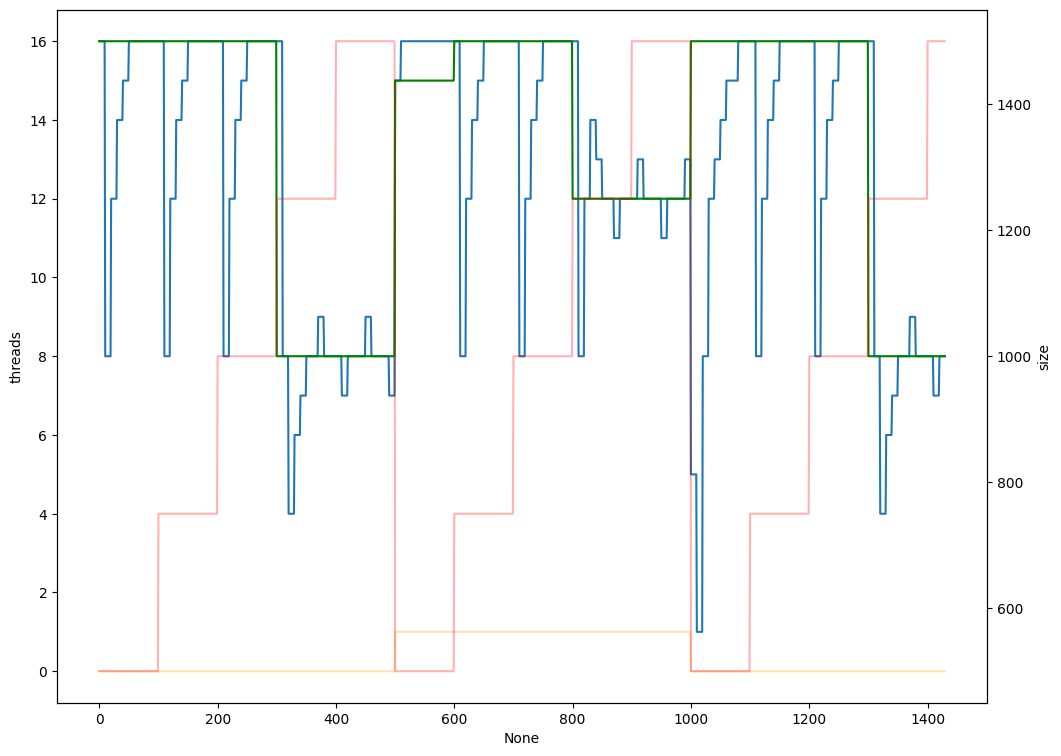

In [57]:
plt.figure(figsize=(12,9))

ax = sns.lineplot(df, x=df.index, y='threads')
sns.lineplot(df, x=df.index, y='optimum', color='g', ax=ax)

sns.lineplot(df, x=df.index, y='pin', color='orange', alpha=0.3, ax=ax)

ax2 = ax.twinx()

sns.lineplot(df, x=df.index, y='size', color='r', alpha=0.3, ax=ax2)

plt.show()